In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

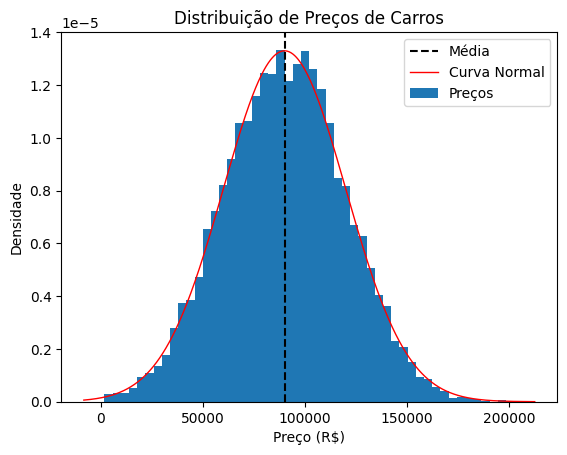

In [16]:
#Criando as variáveis de interesse

#Preço médio do carro Fonte: https://www.infomoney.com.br/consumo/preco-medio-do-carro-0km-chega-a-r-1514-mil-no-brasil-como-fazer-uma-boa-compra/

#Criticar post -> falta de acesso na tabela FIPE https://veiculos.fipe.org.br/

price_mean = 90000 #BRL
price_std = 30000 #BRL

#Limitar a distribuição truncada
lower = 1 #apenas maiores ou igual que 1
upper = np.inf #infinito

a = (lower - price_mean) / price_std
b = (upper - price_mean) / price_std

#Gera a distribuição truncada
price = truncnorm.rvs(a ,b ,loc=price_mean, scale=price_std, size=10000)

#price = np.random.normal(price_mean, price_std, 10000)
plt.hist(price, bins=50, density=True)

xmin, xmax = plt.xlim() # Obtém os limites do eixo x do histograma
x = np.linspace(xmin, xmax, 1000) # Cria um intervalo de valores para a curva
p = norm.pdf(x, price_mean, price_std) # Calcula a PDF da curva normal

plt.axvline(price_mean, color='k', linestyle='--', label='Média')
plt.plot(x, p, 'r', linewidth=1) # Plota a curva em vermelho com espessura 2


plt.title('Distribuição de Preços de Carros')
plt.legend(['Média','Curva Normal', 'Preços'])
plt.xlabel('Preço (R$)')
plt.ylabel('Densidade')
plt.show()


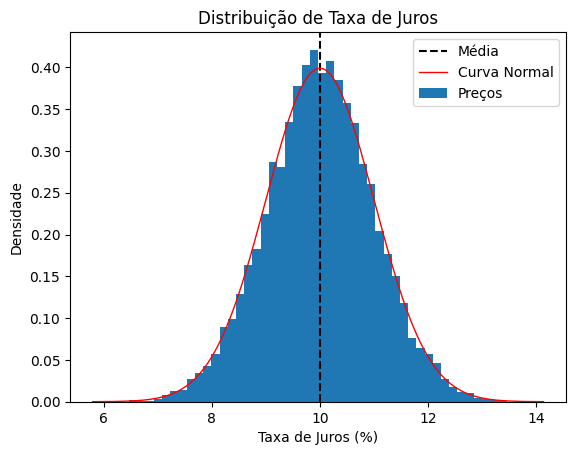

In [17]:
tax_mean = 10 #%
tax_std = 1 #%

tax = np.random.normal(tax_mean, tax_std, 10000)
plt.hist(tax, bins=50, density=True)

xmin, xmax = plt.xlim() # Obtém os limites do eixo x do histograma
x = np.linspace(xmin, xmax, 1000) # Cria um intervalo de valores para a curva
p = norm.pdf(x, tax_mean, tax_std) # Calcula a PDF da curva normal

plt.axvline(tax_mean, color='k', linestyle='--', label='Média')
plt.plot(x, p, 'r', linewidth=1) # Plota a curva em vermelho com espessura 2


plt.title('Distribuição de Taxa de Juros')
plt.legend(['Média','Curva Normal', 'Preços'])
plt.xlabel('Taxa de Juros (%)')
plt.ylabel('Densidade')
plt.show()

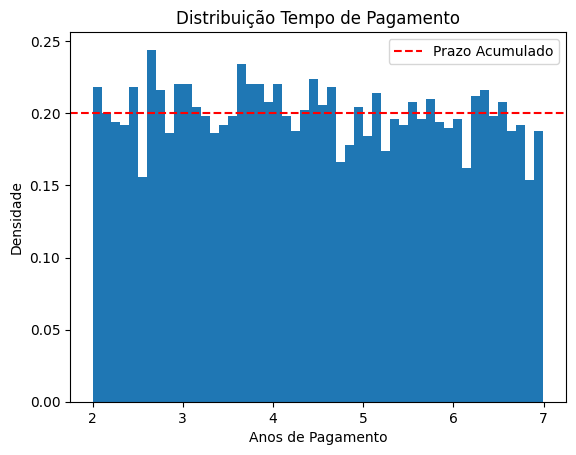

In [18]:
term_max = 7 #Anos
term_min = 2 #Anos

term = np.random.uniform(term_min, term_max, (term_max-term_min)*1000)
counts, bins, patches = plt.hist(term, bins=50, density=True)


y_mean = np.mean(counts)
plt.axhline(y=y_mean, color='red', linestyle='--', label=f'Média do eixo y ({y_mean:.2f})')


plt.title('Distribuição Tempo de Pagamento')
plt.legend(['Prazo Acumulado'])
plt.xlabel('Anos de Pagamento')
plt.ylabel('Densidade')

plt.show()

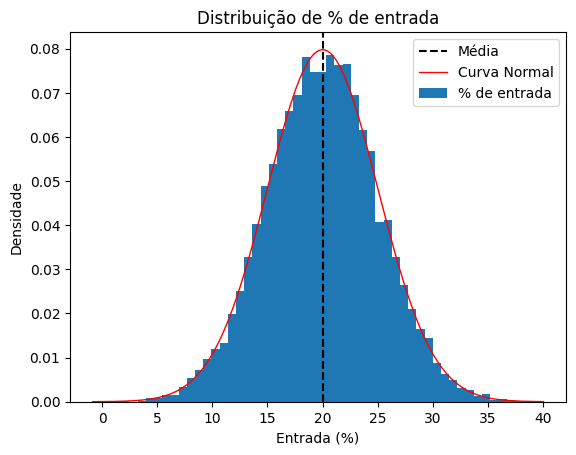

In [19]:
entry_mean = 20 #%
entry_std = 5 #%

entry = np.random.normal(entry_mean, entry_std, 10000)
plt.hist(entry, bins=50, density=True)

xmin, xmax = plt.xlim() # Obtém os limites do eixo x do histograma
x = np.linspace(xmin, xmax, 1000) # Cria um intervalo de valores para a curva
p = norm.pdf(x, entry_mean, entry_std) # Calcula a PDF da curva normal

plt.axvline(entry_mean, color='k', linestyle='--', label='Média')
plt.plot(x, p, 'r', linewidth=1) # Plota a curva em vermelho com espessura 2


plt.title('Distribuição de % de entrada')
plt.legend(['Média','Curva Normal', '% de entrada'])
plt.xlabel('Entrada (%)')
plt.ylabel('Densidade')
plt.show()

Variáveis de interesse:

- Preço do Carro (R$) - Normal média 150k desvio padrão 10000
- Taxa de Juros - Normal com média 10% desvio padrão 1%
- Prazo (anos) - Uniforme 2 a 7 anos
- Tipo de Amortização 
- Valor de Entrada
- Parcela da amortização = Preço do Carro - Entrada / Prazo * 12 

In [20]:
###### TRY E CATCH PARA GERAÇÃO DE VARIÁVEIS ALEATÓRIAS SEM SENTIDO FÍSICO #######
var_min = {
      'Preço Médio': min(price)
    , 'Taxa de Juros': min(tax)
    , 'Prazo de Financiamento': min(term) #essa sempre vai ser maior que 0 pois é limitada no inferior
    , 'Entrada' : min(entry)
    }

In [21]:
var_continuacao_programa = False
try:
    for chave in var_min.keys():
        if not isinstance(var_min[chave],(int,float)) or var_min[chave] <= 0:
            raise ValueError
except ValueError:
    print(f'Variável {chave} com valor {var_min[chave]} ou tipo {type(var_min[chave])} não suportado na distribuição')
else:
    print('Variáveis validadas com sucesso:' + str(var_min.keys()))
    var_continuacao_programa = True

    
    

Variáveis validadas com sucesso:dict_keys(['Preço Médio', 'Taxa de Juros', 'Prazo de Financiamento', 'Entrada'])


In [22]:
def monte_carlo(price, tax, term, entry, n_simulacoes, seed):
    print(price.mean())
    print(tax.mean())
    print(term.mean())
    print(entry.mean())
    print(n_simulacoes)
    print(seed)

In [23]:
def monte_carlo(price, tax, term, entry, n_simulacoes,seed):
    #Colocando a seed como hiperparametro
    np.random.seed(seed=seed)

    simulations = []
    #Realiza a simulação de Monte Carlo
    for _ in range(0,n_simulacoes+1):
        price_idx = np.random.randint(low=0,high=price.shape[0])
        tax_idx = np.random.randint(low=0,high=tax.shape[0])
        term_idx = np.random.randint(low=0,high=term.shape[0])
        entry_idx = np.random.randint(low=0,high=entry.shape[0])

        preco_simulacao = preco_final(price[price_idx], tax[tax_idx], term[term_idx],  entry[entry_idx])
        simulations.append(preco_simulacao)

    return simulations

In [24]:
def preco_final(price, entry, tax, term):
    #Pagamento Mensal Total: (Preço Total - Entrada) * (1 + juros) ^ n_meses    / (1 + juros) ^n_meses  - 1
    #Pagamento Total = Pagamento Mensal Total x n_meses

    #Necessário transformas anos em meses
    tempo_anual = term * 12
    tax_mensal = tax/12/100
    entry_corrigida = entry/100
    pagamento_mensal = ((1-entry_corrigida)*price * (1 + tax_mensal)**tempo_anual) / ((1 + tax_mensal)**tempo_anual - 1 ) 
    
    pagamento_total = pagamento_mensal * tempo_anual

    return pagamento_total

In [25]:
if var_continuacao_programa != True:
    print('Problema encontrado nas variáveis de entrada. Corrija-os antes de continuar.')
else:
    print('Iniciando simulação de Monte Carlo')
    n_simulacoes = 100000 
    seed = 202419
    simulacoes = monte_carlo(price, tax, term, entry, n_simulacoes, seed) 



Iniciando simulação de Monte Carlo


In [26]:
simulacoes

[34778130.990830235,
 22792428.518471364,
 47040796.97547969,
 51000814.329685494,
 30143314.940712456,
 25614975.53969562,
 31588909.500083134,
 91761115.31837001,
 38095290.83785915,
 26743716.645622756,
 22398093.764364004,
 19693847.9821028,
 37472465.55097936,
 41593436.51074557,
 25698586.802679658,
 43593328.598993525,
 24067633.951101266,
 36336161.81799218,
 35149179.882621266,
 28501535.9651856,
 19742879.472298183,
 39059825.401529096,
 3384558.9235097817,
 27069310.339537904,
 60671932.92278168,
 14442003.516662939,
 38694578.272451825,
 9151104.458113786,
 47249956.54590262,
 15187377.372305857,
 68548799.8490905,
 49250668.89495105,
 93477904.85043825,
 88722734.94670302,
 31678239.701503385,
 14512925.043384016,
 45759072.946388744,
 26429723.674153212,
 39417475.561162345,
 45786979.23663222,
 9866353.268000418,
 42711469.604575925,
 37825226.469875135,
 38622081.200300485,
 42867547.69600618,
 31354737.18353951,
 32068110.882019438,
 42078593.98158493,
 38658767.529819